## Machine Learning TP1 : Reconnaissance de Champignon

### Import des librairies

In [ ]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display

from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree, ensemble
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv('/content/champignons.csv')  # Assurez-vous que le fichier est dans le bon répertoire

print(df.head())

toxic_count = df['toxicite'].value_counts()
print(f"Nombre de champignons comestibles: {toxic_count['comestible']}")
print(f"Nombre de champignons toxiques: {toxic_count['toxique']}")

     toxicite surface-chapeau ecchymoses attache-lamelles taille-lamelles  \
0     toxique           lisse        oui            libre          étroit   
1  comestible           lisse        oui            libre           large   
2  comestible           lisse        oui            libre           large   
3     toxique        écaillée        oui            libre          étroit   
4  comestible           lisse        non            libre           large   

    forme-pied surface-pied-sur-anneau couleur-pied-sur-anneau couleur-voile  \
0  élargissant                   lisse                   blanc         blanc   
1  élargissant                   lisse                   blanc         blanc   
2  élargissant                   lisse                   blanc         blanc   
3  élargissant                   lisse                   blanc         blanc   
4       effilé                   lisse                   blanc         blanc   

  type-anneau population  
0     pendant  dispersée  
1 

1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [7]:
df_encoded = pd.get_dummies(df, drop_first=False)

print(df_encoded.shape)

print(df_encoded.columns)

(8124, 42)
Index(['toxicite_comestible', 'toxicite_toxique', 'surface-chapeau_fibreuse',
       'surface-chapeau_lisse', 'surface-chapeau_rainurée',
       'surface-chapeau_écaillée', 'ecchymoses_non', 'ecchymoses_oui',
       'attache-lamelles_adhérent', 'attache-lamelles_libre',
       'taille-lamelles_large', 'taille-lamelles_étroit', 'forme-pied_effilé',
       'forme-pied_élargissant', 'surface-pied-sur-anneau_fibreuse',
       'surface-pied-sur-anneau_lisse', 'surface-pied-sur-anneau_soyeuse',
       'surface-pied-sur-anneau_écaillée', 'couleur-pied-sur-anneau_beige',
       'couleur-pied-sur-anneau_blanc', 'couleur-pied-sur-anneau_brun',
       'couleur-pied-sur-anneau_cannelle', 'couleur-pied-sur-anneau_gris',
       'couleur-pied-sur-anneau_jaune', 'couleur-pied-sur-anneau_orange',
       'couleur-pied-sur-anneau_rose', 'couleur-pied-sur-anneau_rouge',
       'couleur-voile_blanc', 'couleur-voile_brun', 'couleur-voile_jaune',
       'couleur-voile_orange', 'type-anneau_aucun',

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


# Création de l'encodeur et encodage des données
encoder = OneHotEncoder(sparse_output=False)  # Création de l'objet encoder avec option non-sparse
df_encoded = encoder.fit_transform(df)  # Application de l'encodage sur le DataFrame

# Création du DataFrame encodé avec les noms de colonnes générés par l'encoder
new_df = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(input_features=df.columns))

# Mélanger les données pour éviter tout biais
new_df_shuffled = new_df.sample(frac=1).reset_index(drop=True)

# Affichage des premières lignes du DataFrame mélangé
print(new_df_shuffled.head())


   toxicite_comestible  toxicite_toxique  surface-chapeau_fibreuse  \
0                  0.0               1.0                       0.0   
1                  1.0               0.0                       1.0   
2                  0.0               1.0                       0.0   
3                  0.0               1.0                       0.0   
4                  0.0               1.0                       0.0   

   surface-chapeau_lisse  surface-chapeau_rainurée  surface-chapeau_écaillée  \
0                    1.0                       0.0                       0.0   
1                    0.0                       0.0                       0.0   
2                    0.0                       0.0                       1.0   
3                    1.0                       0.0                       0.0   
4                    1.0                       0.0                       0.0   

   ecchymoses_non  ecchymoses_oui  attache-lamelles_adhérent  \
0             0.0             1.0 

1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [15]:
from sklearn.model_selection import train_test_split


labels = new_df_shuffled['toxicite_toxique']
features = new_df_shuffled.drop(['toxicite_comestible', 'toxicite_toxique'], axis=1)

# Création des jeux de données (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Affichage des dimensions
print("Taille des features d'entraînement :", X_train.shape)
print("Taille des labels d'entraînement :", y_train.shape)
print("Taille des features de test :", X_test.shape)
print("Taille des labels de test :", y_test.shape)


Taille des features d'entraînement : (5686, 40)
Taille des labels d'entraînement : (5686,)
Taille des features de test : (2438, 40)
Taille des labels de test : (2438,)


## 2. Arbre de décision

2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

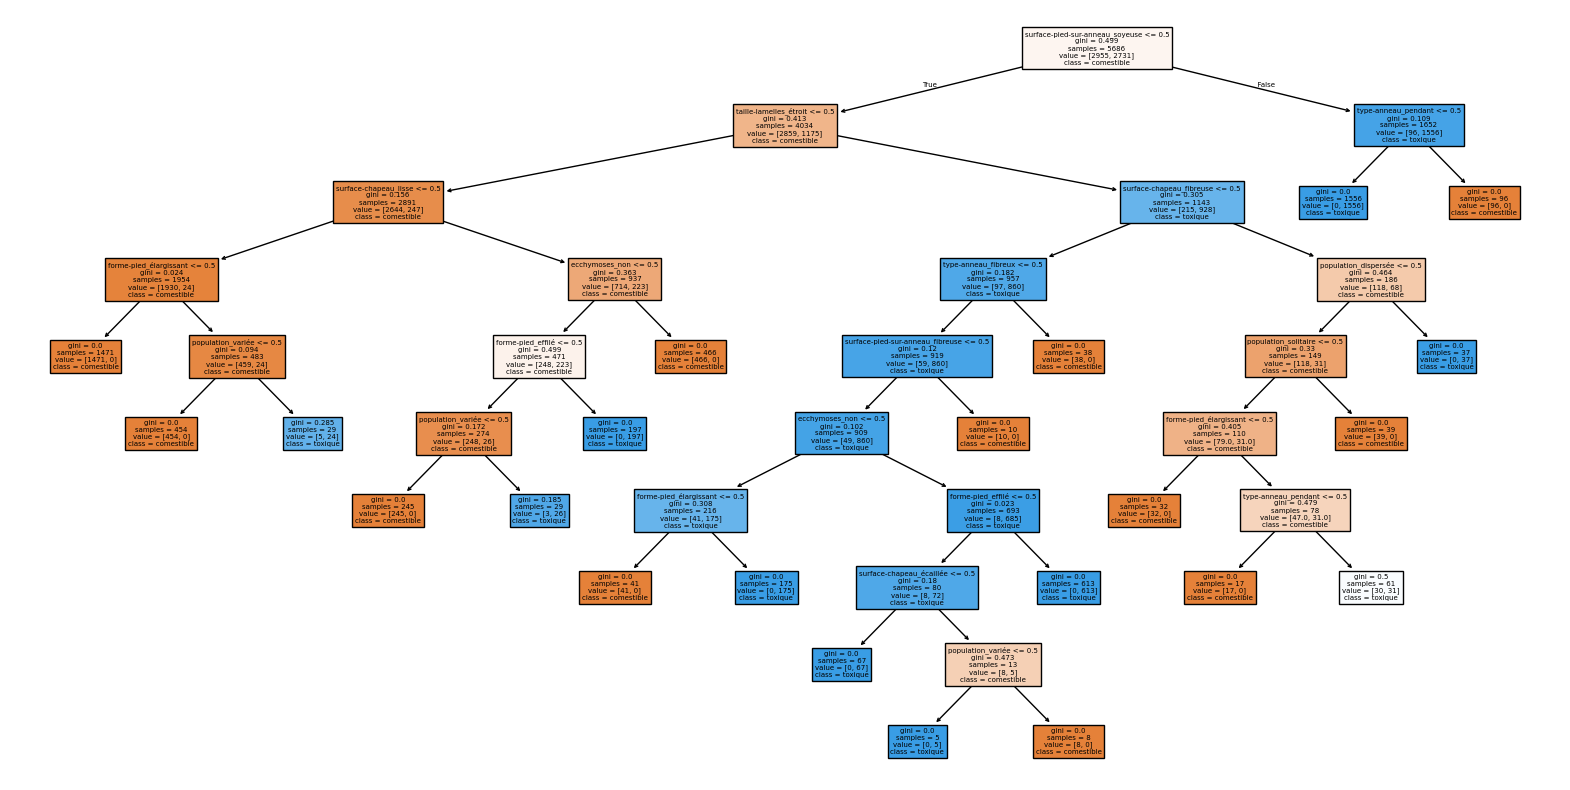

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

# Création et entraînement du modèle
decision_tree_model = tree.DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Visualisation de l'arbre
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree_model,
    feature_names=X_train.columns,
    class_names=['comestible', 'toxique'],
    filled=True
)
plt.show()


2.2 Afficher l'arbre obtenu en utilisant graphwiz

In [17]:
import graphviz
from sklearn.tree import export_graphviz

# Exporter l'arbre en format DOT
dot_data = export_graphviz(
    decision_tree_model,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['comestible', 'toxique'],
    filled=True,
    rounded=True
)

# Afficher avec Graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view()


'decision_tree.pdf'

2.3 Mesurer la précision du modèle sur les données de dev

In [18]:
from sklearn.metrics import accuracy_score

# Prédictions sur les données de test
y_pred_tree = decision_tree_model.predict(X_test)

# Calcul de la précision
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Précision de l'arbre de décision :", accuracy_tree)


Précision de l'arbre de décision : 0.9893355209187858


## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

In [19]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=500, random_state=42)

3.2 Afficher trois arbres au hasard.

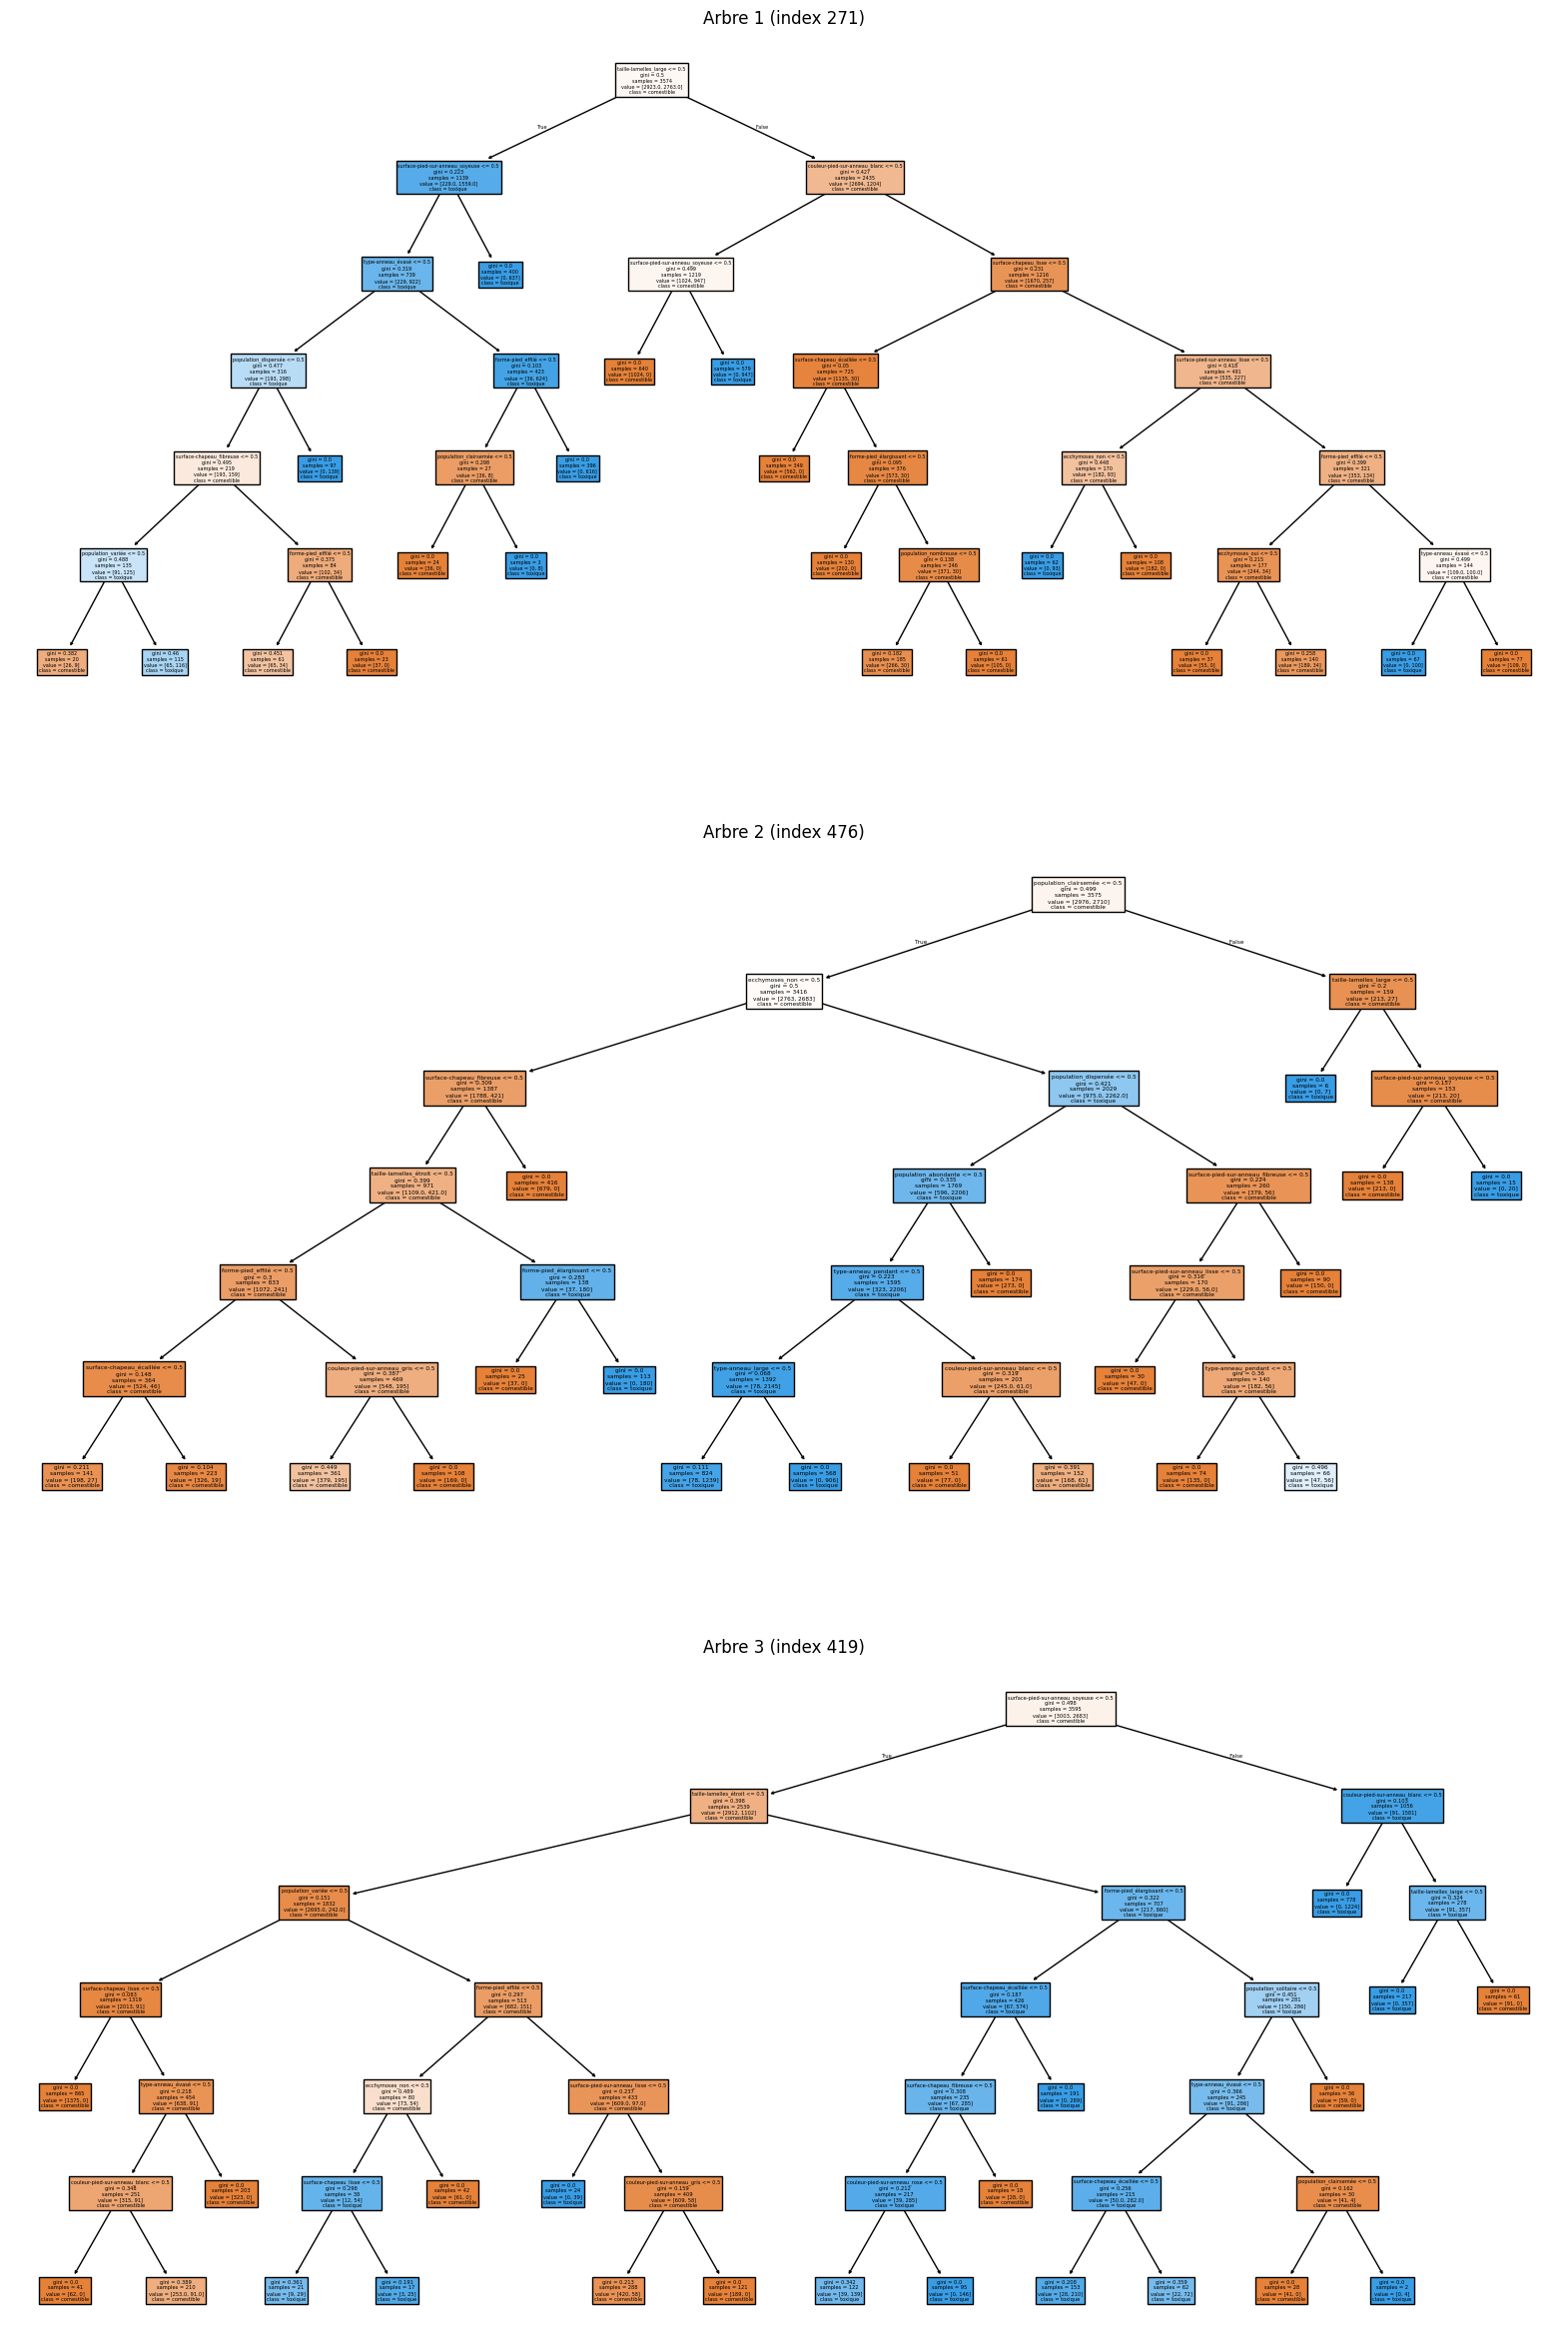

In [20]:
from random import randint

fig, axes = plt.subplots(3, figsize=(20, 10 * 3))

for i in range(3):
    random_tree_index = randint(0, len(random_forest_model.estimators_) - 1)
    tree.plot_tree(
        random_forest_model.estimators_[random_tree_index],
        feature_names=X_train.columns,
        class_names=['comestible', 'toxique'],
        filled=True,
        ax=axes[i]
    )
    axes[i].set_title(f"Arbre {i + 1} (index {random_tree_index})")

plt.show()


3.3 Mesurer la précision du modèle Random Forest sur les données de dev

In [21]:
y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Précision du modèle Random Forest :", accuracy_rf)


Précision du modèle Random Forest : 0.9659557013945858


## 4. optimisation des paramètres

4.1 En utilisant GridSearchCV, chercher la meilleure combinaison max_depth et n_estimator.

Afficher les paramètre du modèle et a précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Définition la grille de paramètres à tester
params = {
    'n_estimators': [100, 200, 300, 400, 500],  # Différents nombres d'arbres
    'max_depth': [None, 5, 6, 7, 8, 9, 10]      # Différentes profondeurs maximales
}

# Création de la GridSearch
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), params, scoring="accuracy")

# Recherche des meilleurs params
grid_search.fit(X_train, y_train)

# Obtention des meilleurs paramètres
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Affichage des meilleurs paramètres et de la précision obtenue
print("Meilleure combinaison de paramètres :")
print(f"n_estimators: {best_params['n_estimators']}, max_depth: {best_params['max_depth']}")
print(f"Précision obtenue : {best_accuracy:.4f}")

# Réentraînement du modèle avec les meilleurs paramètres
best_random_forest_model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       random_state=42)

best_random_forest_model.fit(X_train, y_train)

4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

In [ ]:
# Prédiction des labels sur les données de validation avec le modèle réentraîné
y_test_pred = best_random_forest_model.predict(X_test)

# Calcul de la précision sur les données de validation
dev_accuracy = accuracy_score(y_test, y_test_pred)

# Affichage des paramètres optimaux et de la précision obtenue
print("Paramètres optimaux :")
print(f"n_estimators: {best_params['n_estimators']}, max_depth: {best_params['max_depth']}")
print(f"Précision obtenue sur les données de validation : {dev_accuracy:.4f}")

4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

In [26]:
# Importance des caractéristiques
importances = best_rf_model.feature_importances_

# Création d'un DataFrame pour les importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Filtrage et tri des caractéristiques importantes
important_features = importance_df[importance_df['Importance'] > 0.01]
important_features = important_features.sort_values(by='Importance', ascending=False)

print("Caractéristiques importantes (> 1%) :")
print(important_features)


NameError: name 'best_rf_model' is not defined

## 5. Stacking

Essayer différents modèles d'estimateur final

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Modèles de base
base_estimators = [
    ('svc', make_pipeline(StandardScaler(), SVC(probability=True))),
    ('logistic', LogisticRegression()),
    ('naive_bayes', GaussianNB())
]

# Test avec différents estimateurs finaux
final_estimators = [LogisticRegression(), RandomForestClassifier(), SVC(probability=True)]

for final_estimator in final_estimators:
    stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)
    stacking_model.fit(X_train, y_train)

    # Précision
    y_pred_stack = stacking_model.predict(X_test)
    accuracy_stack = accuracy_score(y_test, y_pred_stack)
    print(f"Estimateur final {final_estimator.__class__.__name__} - Précision :", accuracy_stack)


## 6. Gradient Boosting

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Précision Gradient Boosting (sans early stopping) :", accuracy_gb)

gb_model_es = GradientBoostingClassifier(
    n_estimators=500, random_state=42,
    validation_fraction=0.1, n_iter_no_change=5
)
gb_model_es.fit(X_train, y_train)
y_pred_gb_es = gb_model_es.predict(X_test)
accuracy_gb_es = accuracy_score(y_test, y_pred_gb_es)
print("Précision Gradient Boosting (avec early stopping) :", accuracy_gb_es)


## 7. (Optionnel) Recommencer les execices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?